# [Aditya Rajesh]
# Programming Exercise \#3
---

# Preamble

In [17]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
/var/folders/jc/ls3v0yk16xx0_4jnbd8m2x_w0000gn/T/ipykernel_48170/3524984580.py:4: SyntaxWarning: invalid escape sequence '\ '
  '''


"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [18]:
# import relevant Python libraries

###
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from scipy.stats import norm
###

# **1. Noise Level Classification Using Plug-in Classifiers**

## 1.1

### (a)

In [19]:
train_data = pd.read_csv('NoiseClassificationTrainingData.csv')

class_0 = train_data[train_data['ClassLabel'] == 0]['NoiseLevel']
class_1 = train_data[train_data['ClassLabel'] == 1]['NoiseLevel']
class_2 = train_data[train_data['ClassLabel'] == 2]['NoiseLevel']

mean_0 = class_0.mean()
mean_1 = class_1.mean()
mean_2 = class_2.mean()

combined_data = np.concatenate([
    class_0 - mean_0,
    class_1 - mean_1,
    class_2 - mean_2
])

common_variance = np.var(combined_data, ddof=0)

print("MLE Mean for Class 0:", mean_0)
print("MLE Mean for Class 1:", mean_1)
print("MLE Mean for Class 2:", mean_2)
print("Common Variance (MLE):", common_variance)

###

MLE Mean for Class 0: 44.65630954576823
MLE Mean for Class 1: 55.277231807111434
MLE Mean for Class 2: 64.88690064177815
Common Variance (MLE): 11.995287584605002


### (b)

_[By default, numpy.var() returns the MLE (biased estimate) with parameter ddof=0. Setting the parmeter ddof=1 gives the unbiased estimate.]_

## 1.2

### (a)

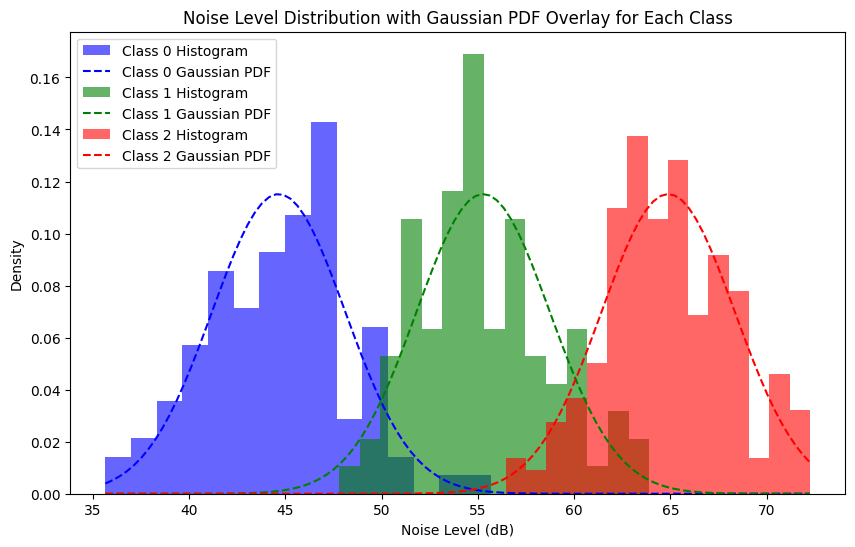

In [20]:
### 

class_0 = train_data[train_data['ClassLabel'] == 0]['NoiseLevel']
class_1 = train_data[train_data['ClassLabel'] == 1]['NoiseLevel']
class_2 = train_data[train_data['ClassLabel'] == 2]['NoiseLevel']
mean_0 = class_0.mean()
mean_1 = class_1.mean()
mean_2 = class_2.mean()
common_variance = 11.995287584605002

x_values = np.linspace(train_data['NoiseLevel'].min(), train_data['NoiseLevel'].max(), 100)

plt.figure(figsize=(10, 6))

plt.hist(class_0, bins=15, density=True, alpha=0.6, color='blue', label='Class 0 Histogram')
pdf_class_0 = norm.pdf(x_values, mean_0, np.sqrt(common_variance))
plt.plot(x_values, pdf_class_0, color='blue', linestyle='--', label='Class 0 Gaussian PDF')

plt.hist(class_1, bins=15, density=True, alpha=0.6, color='green', label='Class 1 Histogram')
pdf_class_1 = norm.pdf(x_values, mean_1, np.sqrt(common_variance))
plt.plot(x_values, pdf_class_1, color='green', linestyle='--', label='Class 1 Gaussian PDF')

plt.hist(class_2, bins=15, density=True, alpha=0.6, color='red', label='Class 2 Histogram')
pdf_class_2 = norm.pdf(x_values, mean_2, np.sqrt(common_variance))
plt.plot(x_values, pdf_class_2, color='red', linestyle='--', label='Class 2 Gaussian PDF')

plt.xlabel('Noise Level (dB)')
plt.ylabel('Density')
plt.title('Noise Level Distribution with Gaussian PDF Overlay for Each Class')
plt.legend()
plt.show()

###

### (b)

_[The Gaussian PDFs aligns pretty well with the shape and spread of the histograms for each class, showing that the noise levels in each environment follow a roughly normal distribution. Overall, the Gaussian model with distinct means for each class looks right for representing these classes.]_

## 1.3

In [21]:
###
total_samples = len(train_data)

class_0_count = len(train_data[train_data['ClassLabel'] == 0])
class_1_count = len(train_data[train_data['ClassLabel'] == 1])
class_2_count = len(train_data[train_data['ClassLabel'] == 2])

prior_class_0 = class_0_count / total_samples
prior_class_1 = class_1_count / total_samples
prior_class_2 = class_2_count / total_samples

print("Prior probability for Class 0:", prior_class_0)
print("Prior probability for Class 1:", prior_class_1)
print("Prior probability for Class 2:", prior_class_2)

###

Prior probability for Class 0: 0.2625
Prior probability for Class 1: 0.22
Prior probability for Class 2: 0.5175


## 1.4

In [22]:
### 
test_data = pd.read_csv('NoiseClassificationTestData.csv')

means = [mean_0, mean_1, mean_2]
common_variance = 11.995287584605002  # Substitute with calculated value if different

priors = [prior_class_0, prior_class_1, prior_class_2]

loss_matrix = np.array([
    [-1,  2,  4],
    [ 2,  0,  4],
    [ 4,  4,  0]
])

def calculate_likelihoods(noise_level, means, variance):
    return [norm.pdf(noise_level, mu, np.sqrt(variance)) for mu in means]

ml_predictions = []
map_predictions = []
bayes_predictions = []
true_labels = test_data['ClassLabel']
num_classes = 3
ml_correct = [0] * num_classes
map_correct = [0] * num_classes
bayes_correct = [0] * num_classes


for _, row in test_data.iterrows():
    noise_level = row['NoiseLevel']
    true_label = int(row['ClassLabel'])  # Convert true_label to integer

    likelihoods = calculate_likelihoods(noise_level, means, common_variance)

    ml_class = np.argmax(likelihoods)
    ml_predictions.append(ml_class)
    if ml_class == true_label:
        ml_correct[true_label] += 1

    posterior_probabilities = [likelihood * prior for likelihood, prior in zip(likelihoods, priors)]
    map_class = np.argmax(posterior_probabilities)
    map_predictions.append(map_class)
    if map_class == true_label:
        map_correct[true_label] += 1

    expected_losses = [
        sum(loss_matrix[c][j] * likelihoods[j] for j in range(num_classes))
        for c in range(num_classes)
    ]
    bayes_class = np.argmin(expected_losses)
    bayes_predictions.append(bayes_class)
    if bayes_class == true_label:
        bayes_correct[true_label] += 1

print("ML Classifier Results:")
print("Classified as Class 0:", ml_predictions.count(0))
print("Classified as Class 1:", ml_predictions.count(1))
print("Classified as Class 2:", ml_predictions.count(2))
print("Correct classifications per actual class:", ml_correct)

print("\nMAP Classifier Results:")
print("Classified as Class 0:", map_predictions.count(0))
print("Classified as Class 1:", map_predictions.count(1))
print("Classified as Class 2:", map_predictions.count(2))
print("Correct classifications per actual class:", map_correct)

print("\nPlug-in Bayes Classifier Results:")
print("Classified as Class 0:", bayes_predictions.count(0))
print("Classified as Class 1:", bayes_predictions.count(1))
print("Classified as Class 2:", bayes_predictions.count(2))
print("Correct classifications per actual class:", bayes_correct)

###

ML Classifier Results:
Classified as Class 0: 22
Classified as Class 1: 28
Classified as Class 2: 50
Correct classifications per actual class: [21, 21, 50]

MAP Classifier Results:
Classified as Class 0: 23
Classified as Class 1: 25
Classified as Class 2: 52
Correct classifications per actual class: [22, 20, 51]

Plug-in Bayes Classifier Results:
Classified as Class 0: 25
Classified as Class 1: 25
Classified as Class 2: 50
Correct classifications per actual class: [24, 21, 50]


## 1.5

### (a)

In [23]:
### 
total_samples = len(test_data)
ml_incorrect = total_samples - sum(ml_correct)
map_incorrect = total_samples - sum(map_correct)
bayes_incorrect = total_samples - sum(bayes_correct)
ml_error = ml_incorrect / total_samples
map_error = map_incorrect / total_samples
bayes_error = bayes_incorrect / total_samples

print("Empirical Misclassification Error (Zero-One Loss):")
print(f"ML Classifier Error: {ml_error:.4f}")
print(f"MAP Classifier Error: {map_error:.4f}")
print(f"Plug-in Bayes Classifier Error: {bayes_error:.4f}")
###

Empirical Misclassification Error (Zero-One Loss):
ML Classifier Error: 0.0800
MAP Classifier Error: 0.0700
Plug-in Bayes Classifier Error: 0.0500


### (b)

In [24]:
###
loss_matrix = np.array([
    [-1,  2,  4],
    [ 2,  0,  4],
    [ 4,  4,  0]
])

ml_total_loss = 0
map_total_loss = 0
bayes_total_loss = 0

for i, row in test_data.iterrows():
    true_label = int(row['ClassLabel'])
    
    ml_pred = ml_predictions[i]
    ml_total_loss += loss_matrix[true_label, ml_pred]
    map_pred = map_predictions[i]
    map_total_loss += loss_matrix[true_label, map_pred]
    bayes_pred = bayes_predictions[i]
    bayes_total_loss += loss_matrix[true_label, bayes_pred]

ml_empirical_risk = ml_total_loss / total_samples
map_empirical_risk = map_total_loss / total_samples
bayes_empirical_risk = bayes_total_loss / total_samples

print("Empirical Risk (Average Loss) for Each Classifier:")
print(f"ML Classifier Empirical Risk: {ml_empirical_risk:.4f}")
print(f"MAP Classifier Empirical Risk: {map_empirical_risk:.4f}")
print(f"Plug-in Bayes Classifier Empirical Risk: {bayes_empirical_risk:.4f}")

###

Empirical Risk (Average Loss) for Each Classifier:
ML Classifier Empirical Risk: -0.0300
MAP Classifier Empirical Risk: -0.0600
Plug-in Bayes Classifier Empirical Risk: -0.1200


## 1.6

### (a)

_[The ML classifier is theoretically designed to minimize the expected zero–one loss, and this classifier assigns each sample to the class with the highest likelihood. This is done to aim to maximize correct classifications without considering prior probabilities or specific loss values for different types of misclassification.]_

### (b)

_[The Plug-in Bayes Classifier is theoretically designed to minimize the expected general loss when a loss matrix is specified, and this classifier selects the class that minimizes the expected loss based on the given loss matrix, incorporating the different costs associated with misclassifications.]_

### (c)

_[The empirical results largely align with theoretical expectations that the ML classifier shows a higher misclassification error as it ignores priors and the loss matrix, while the MAP classifier improves on this by incorporating prior probabilities, reducing error when priors are relevant.Finally, with the Plug-in Bayes classifier, it achieves the lowest empirical risk and misclassification error, fulfilling its theoretical goal of minimizing expected loss using the loss matrix, which would most likely improve its accuracy for this dataset.]_

### (d)

_[There are some discrepancies between empirical results and theoretical guarantees mainly from small sample sizes, which increase variability and the impact of outliers. When we use larger training and test sets, results would follow more closely with theoretical expectations, as classifiers would better show the true data distributions. This would allow the ML classifier to minimize misclassification error, the MAP classifier to incorporate priors effectively, and the Bayes classifier to optimize based on the loss matrix.]_